In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transaction-naration-data-set-test/test.csv
/kaggle/input/transaction-naration-data-set/Transaction_Naration_Data_Set.csv


In [2]:
data=pd.read_csv('/kaggle/input/transaction-naration-data-set/Transaction_Naration_Data_Set.csv')
data.head()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,0,3644877,342800.0,01-NOV-22,Cash Withdraw,Debit
1,1,1175256,342800.0,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2,2298226,1500.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,3,4066427,1500.0,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,4,1978564,2550.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit


In [ ]:
test_data=pd.read_csv('/kaggle/input/transaction-naration-data-set-test/test.csv')
test_data.head()

In [ ]:
cols=['NARATION']
duplicates = data.duplicated(subset=cols,keep=False)
print(duplicates)

In [ ]:
print("Number of duplicates:", duplicates.sum())

In [ ]:
data.info()

In [4]:
def drop_duplicates(dataset):
    cols=['NARATION']
    sub_data = dataset.drop_duplicates(subset=cols)
    return sub_data
# sub_data.isnull().sum()

In [3]:
import warnings

# Filter out warning messages
warnings.filterwarnings('ignore')


In [ ]:
sub_data.isnull().sum()

In [6]:
def drop_null(dataset):
    dataset.dropna(subset=['NARATION'],inplace=True)
    return dataset
# sub_data.isnull().sum()
# sub_data.info()

In [7]:
sub_data=drop_duplicates(data)

In [8]:
sub_data=drop_null(sub_data)

In [9]:
narations=sub_data[['NARATION','AC_ID']].copy()
narations.tail()

,NARATION,AC_ID
22538287,Guatala Udc,4010179
22539045,"Transaction For Fund Transfer. Smart App, Regu...",4199653
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন,2389876
22543261,আসাদ ভাই এর কাছে জমা হাজার টাকা,4817300
22544595,গাড়ামাসি পল্লী উন্নয়ন সমবায় সমিতি আস সেবা আদ...,789386


In [ ]:
narations.dropna(subset=['NARATION'],inplace=True)
narations.info()

In [ ]:
narations.isnull().sum()
# sub_data.info()

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_trf


In [10]:
import spacy
nlp = spacy.load("en_core_web_sm")



In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 

# stop_words=set(stopwords.words('english'))

ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nltk.download('names')
name_dictionary = nltk.corpus.words.words()

# def find_person_names(text, name_dictionary):
#     person_names = []
#     words = text.split()
#     for word in words:
#         if word.capitalize() in name_dictionary:
#             person_names.append(word)
#     return person_names


In [12]:
necessary_words = ['eftn', 'ft', 'bkash','bKash','nogod', 'rtgs', 'pos',
                   'cib', 'paywell', 'challan', 'npsb', 'dps', 'atm', 'trf', 'sonod',
                   'smart','app','smart app']

unnecessary_words=['month', 'bari', 'china', 'german', 'zero', 'first',
                   'today', 'daily', 'mim', 'nova', 'bas', 'year', 'week', 
                   'martin', 'two', 'june', 'monthly', 'khan', 'twelve', 'eighteen',
                   'quarterly', 'bakula', 'weekly', 'hour', 'august', 'annual', 'patwari',
                   'gore', 'fourteen', 'al', 'second', 'yesterday', 'shanghai', 'kokan', 
                   'noon', 'fifteen', 'japan', 'sec', 'abu','para', 'weekly', 'ba', 'saddik', 
                   'oct', 'eighteen', 'ka', 'c', 'dor', 'na', 'gate', 'point', 'dal', 'feb', 
                   'german', 'december', 'id', 'begum', 'ink', 'zero', 'mim', 'bas', 'tapu', 
                   'orient', 'mo', 'abu', 'brother', 'tala', 'daud', 'new', 'type', 'title', 
                   'outlet', 'jan', 'name', 'october', 'th', 'kokan', 'aug', 'currier', 
                   'doll', 'u', 'august', 'service', 'tara', 'nov', 'tony', 'mar', 'bin',
                   'february', 'k', 'china', 'martin', 'st', 'jowel', 'x', 'sha', 'dada',
                   'today', 'noon', 'ad', 'yesterday', 'ae', 'amir', 'sweety', 'mother', 'mu',
                   'hanif', 'mullah', 'july', 'first', 'nova', 'japan', 'ge', 'rocky', 
                   'rana', 'pu', 'annual', 'second', 'omer', 'bibi', 'fakir', 'southeast',
                   'da', 'cotton', 'apr', 'coxs', 'al', 'jun', 'sima', 'e', 'bakula', 'dola',
                   'pur', 'quarterly', 'amenia', 'shanghai', 'shahin', 'babu', 'ar', 'bu',
                   'tania', 'p', 'm', 'june', 'patwari', 'barman', 'dey', 'sir', 'daily',
                   'i', 'khan', 'raj', 'rani', 'week', 'boro', 'momo', 'sep', 'b', 'pally', 
                   'sultana', 'fourteen', 'link', 'palli', 'ghat', 'chad', 'l', 'das', 'dec', 
                   'mir', 'march', 'hour', 'sri', 'kaka', 'september', 'r', 'auto', 'nandi',
                   'month', 'amt', 'kazi', 'year', 'puja', 'hasan', 'november', 'amin', 'may', 
                   'date', 'monthly', 'razor', 'sheik', 'road', 'gore', 'january', 'bari', 
                   'nid', 'say', 'april', 'total', 'twelve', 'shah', 'sec', 'fifteen', 'doc',
                   'son', 'maria', 'jul', 'two','ac','mm','agri','inter','polli',
                   'bidyut','islam','islami','hossain','akter','md','ltd','salari','salrari','salrary','mia',
                   'miah','ali','agrani','rahman','saiful','arif',
                   'thousand','taka','lakh','uddin','udc','ab','dol','doll','somiti','purush',
                   'asol','uttor','rd','rlp','polli bidyut','janata','rupali ','m','store','sandwip',
                   'enterprise','sadar','polly','sme','senderamlabo','cashseddate','teota'
                   'raigor','mohila','suraighat','bazar','shohor','uposhohor']
pre_pos= ['aboard', 'about', 'above', 'across', 'after', 'against', 'along', 'amid',
          'among', 'around', 'as', 'at', 'before', 'behind', 'below', 'beneath',
          'beside', 'between', 'beyond', 'but', 'by', 'concerning', 'considering', 
          'despite', 'down', 'during', 'except', 'for', 'from', 'in', 'inside', 'into', 
          'like', 'near', 'of', 'off', 'on', 'onto', 'out', 'outside', 'over', 'past',
          'regarding', 'round', 'since', 'through', 'throughout', 'to', 'toward', 'under',
          'underneath', 'until', 'unto', 'up', 'upon', 'with', 'within', 'without']


In [ ]:
# for x in necessary_words:
#     if x in name_dictionary:
#         print(x)
x='Rakib Hasan Roll'
t= x in name_dictionary
t

In [13]:
stop_words = set(stopwords.words("english")+unnecessary_words+pre_pos)
# stop_words[:10]

In [14]:
import re


In [15]:
import string

In [16]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
lematizer = WordNetLemmatizer()
lematizer.lemmatize("words")

'word'

Uniziping the wordnet.zip had to do it manually in kaggle. Only then the above lematizer works

In [ ]:
%cd /usr/share/nltk_data/corpora
! unzip "/usr/share/nltk_data/corpora/wordnet.zip"
%cd /kaggle/working

**Removes name that are not on necessary_words**

In [18]:
def name_removal(text):
  doc=nlp(text)
  sz=len(doc.ents)
#   print(doc.ents)
  modified_string = ""
  if(sz>0):
    for entity in doc.ents:
        ent=entity.text
#         print(ent)
        if(ent.lower() in necessary_words):
#             print(ent.lower())
            modified_string=text
            continue
        elif ((entity.label_ == "PERSON" or entity.label_ == "NORP" or entity.label_ == "LOC" or entity.label_ == "GPE")):
            modified_string = text.replace(ent, "")
        else:
            modified_string=text
#         modified_string = text.replace(ent, "")
  else:
    modified_string=text
  return modified_string

In [ ]:
txt=name_removal('transfer to bKash ')
txt

**Removes punc and special characters. Tokenizes them**

In [19]:
def preprocess_text(text):
    # Remove punctuation
    text=str(text)
    text=name_removal(text)
    text=text.lower()
#     text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"[^A-Za-z\s]", "", text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
#     stop_words = set(stopwords.words("english"))
#     lematizer.lemmatize(w) for w in word_tokenize(text) if not w in stop_words
    tokens = [lematizer.lemmatize(token,'v') for token in tokens if token.lower() not in stop_words]
#     tokens=[ps.stem(w) for w in tokens]
#     dataset['tokens']=tokens
    return tokens


**Stores tokens in "tokens" column of dataset**

In [20]:
def tokenize(dataset):
    tokens_list=list()
    for index, row in dataset.iterrows():
#         p=model.predict(row['avg_vec'].reshape(1, -1))
        t=preprocess_text(row['NARATION'])
        tokens_list.append(t)
        
#         print(type(t))
        
#         p=preprocess_text(row['NARATION'])
        
#     print(len(tokens_list))
#     print(dataset.shape) 
    dataset['tokens']=tokens_list
   
    return dataset
    

In [21]:
narations=tokenize(narations)
narations.tail()

,NARATION,AC_ID,tokens
22538287,Guatala Udc,4010179,[]
22539045,"Transaction For Fund Transfer. Smart App, Regu...",4199653,"[transaction, fund, transfer, smart, app, regu..."
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন,2389876,"[cash, deposit]"
22543261,আসাদ ভাই এর কাছে জমা হাজার টাকা,4817300,[]
22544595,গাড়ামাসি পল্লী উন্নয়ন সমবায় সমিতি আস সেবা আদ...,789386,[]


In [23]:
narations=drop_empty_tokens(narations)
narations.tail()

,NARATION,AC_ID,tokens
22536013,"Smart App, Fund Transfer. wife DPS Money",652566,"[smart, app, fund, transfer, wife]"
22536483,Cash Deposit Suraighat bazar SME,5418855,"[cash, deposit]"
22538051,Cash Deposit Raigor Mohila dol,5418855,"[cash, deposit, raigor]"
22539045,"Transaction For Fund Transfer. Smart App, Regu...",4199653,"[transaction, fund, transfer, smart, app, regu..."
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন,2389876,"[cash, deposit]"


In [24]:
c=0
for index, row in narations.iterrows():
        # Check if the token list is empty
        if len(row['tokens']) == 0:
#             print("Row", index, "has an empty token list")
            c+=1
print(c)

0


**Dropping empty rows **

In [22]:
def drop_empty_tokens(dataset):
    # Find rows with empty token lists
    empty_token_rows = dataset['tokens'].apply(lambda tokens: len(tokens) == 0)

    # Drop rows with empty token lists
    dataset = dataset[~empty_token_rows]

    return dataset

In [ ]:
%pwd


In [53]:
def most_common_tokens_bar(dataset):
    lemmatized_tokens = list(dataset['tokens'])
    token_list = list(itertools.chain(*lemmatized_tokens))
    counts_no = collections.Counter(token_list)
    clean_tweets = pd.DataFrame(counts_no.most_common (30), columns=['words', 'count'])
    fig, ax = plt.subplots(figsize=(8, 8))
    clean_tweets.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue')
    ax.set_title("Most Frequently used words in Narrations")

    plt.show()

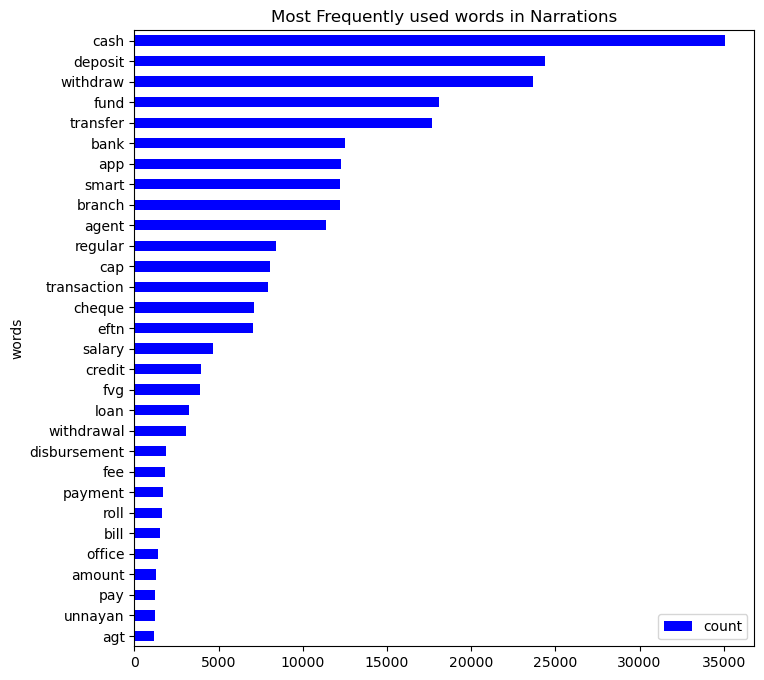

In [25]:
import itertools
import collections
import matplotlib.pyplot as plt

lemmatized_tokens = list(narations['tokens'])
token_list = list(itertools.chain(*lemmatized_tokens))
counts_no = collections.Counter(token_list)
clean_tweets = pd.DataFrame(counts_no.most_common (30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue')
ax.set_title("Most Frequently used words in Narrations")

plt.show()

In [ ]:
tokens=narations['NARATION'].tolist()
narations['st_tokens']=narations['no_name']
narations=narations.drop('NARATION',axis=1)
# narations['st_tokens'] = narations['NARATION'].apply(lambda x: [ps.stem(word) for word in x])

In [ ]:
narations.head()

**Debug **

In [ ]:

def to_list(text,ls):
  
  for x in text:
    ls.append(x)
    

In [ ]:
t_list=list()
for index, row in narations.iterrows():
    # print("Row Index:", index)
    # print("Column 1:", row['st_tokens'])
    to_list(row['st_tokens'],t_list)

In [ ]:
t_list[:10]

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
token_list=narations['tokens'].tolist()

In [ ]:
# token_list=narations['st_tokens'].tolist()
test_tok_list=test_data['tokens'].tolist()

**Word vectorizing**

In [26]:
from gensim.models import Word2Vec

# Assuming 'tokens' is a list of tokenized documents
# model = Word2Vec(token_list,min_count=1)
# test_model=Word2Vec(test_tok_list,min_count=1)
# X = [model[token] for token in tokens]



**helping func of avg_vectorized**

In [27]:
def vectorizing_model(token_list):
    model=Word2Vec(token_list,min_count=1)
    return model
    

**helping func of avg_vectorized**

In [28]:
# lambda x: [model.wv.get_vector(word ,norm=True) for word in x]
def avg_vec(vectors):
    s_vec=np.zeros(100)
    cnt=0
    for v in vectors:
        cnt+=1
        s_vec+=v
    s_res=s_vec/cnt
    return s_res
    

**Avg_vectorized**
adds 2 columns 'vectorized' is with all vectorized form of words in tokens and 'avg_vec' is the average of all words vectors 

In [29]:
def avg_vectorized(dataset):
    # tokenlist
    token_list=dataset['tokens'].tolist()
#     make model
    model=vectorizing_model(token_list)
#     vectorized field
    dataset['vectorized'] = dataset['tokens'].apply(lambda x: [model.wv.get_vector(word ,norm=True) for word in x])
    
    dataset['avg_vec']= dataset['vectorized'].apply(avg_vec)
    
    dataset.drop('vectorized',axis=1)

    # Drop rows with empty token lists
#     dataset = dataset[~empty_token_rows]

    return dataset

In [ ]:

print(model)

In [30]:
narations=avg_vectorized(narations)
narations.head()

,NARATION,AC_ID,tokens,vectorized,avg_vec
0,Cash Withdraw,3644877,"[cash, withdraw]","[[-0.0133382995, 0.06694116, -0.04999457, 0.18...","[-0.09153545740991831, 0.06871321052312851, -0..."
1,Cash Withdrawal From A/C No.:,1175256,"[cash, withdrawal]","[[-0.0133382995, 0.06694116, -0.04999457, 0.18...","[-0.07609830144792795, 0.09331553056836128, -0..."
2,"Cash withdraw from Micro Merchant point, MM A/C",2298226,"[cash, withdraw, micro, merchant]","[[-0.0133382995, 0.06694116, -0.04999457, 0.18...","[0.014512681867927313, 0.052446963265538216, -..."
3,Credit Against Merchant Cash Withdraw Service ...,4066427,"[credit, merchant, cash, withdraw]","[[-0.053178236, 0.031390846, -0.016621001, -0....","[-0.031515220645815134, 0.0523514449596405, -0..."
6,Cash Deposit to A/C No.:,38418,"[cash, deposit]","[[-0.0133382995, 0.06694116, -0.04999457, 0.18...","[-0.05596162844449282, 0.11504308879375458, 0...."


In [ ]:
len(narations['avg_vec'][0])

In [ ]:
# X = [model[token] for token in tlist]
print(model)
print(test_model)

In [ ]:
# def vectorize(text):
#     return [model.wv.get_vector(w ,norm=True) for w in word_tokenize(text)]

In [ ]:
# tokens_trx['vectorized']=tokens_trx['NARATION'].apply(vectorize)
# print(vectorize(tokens_trx['NARATION'][0][1]))

In [ ]:
narations

In [ ]:
narations = narations[narations['avg_vec'].apply(lambda arr: not np.isnan(arr).any())]

# Reset the index if needed
narations = narations.reset_index(drop=True)

In [31]:
avg_vec_list=narations['avg_vec'].tolist()
has_nan = any(np.isnan(arr).any() for arr in avg_vec_list)

# Print the result
print(has_nan)

False


In [33]:
from sklearn.cluster import KMeans, MiniBatchKMeans, BisectingKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import scale

In [ ]:
avg_vec_list=narations['avg_vec'].tolist()

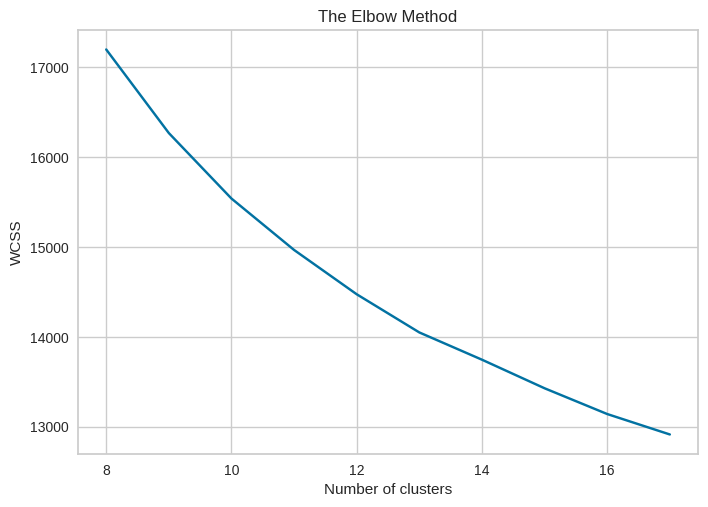

In [34]:
wcss = []

for i in range(8,18):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(avg_vec_list)
    wcss.append(kmeans.inertia_)

plt.plot(range(8,18),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

**Elbow finding**

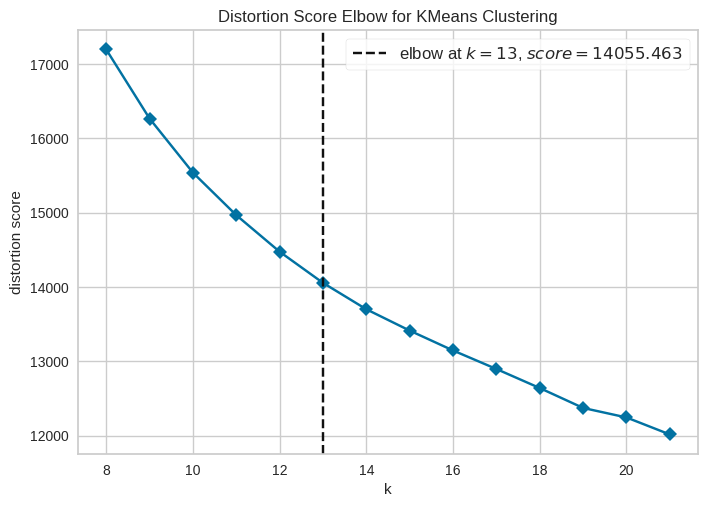

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(8,22), timings= False)
visualizer.fit(np.array(avg_vec_list))        # Fit data to visualizer
visualizer.show()  

**Training Kmeans**

In [37]:
def train_kmeans(dataset):
    avg_vec_list=dataset['avg_vec'].tolist()
    kmeans_model = KMeans(n_clusters = 13, init = 'k-means++', max_iter = 300, n_init = 10, random_state = None)
    # v_tokens=model.wv.get_normed_vectors()

    # type(avg_vec_list)
    kmeans_model.fit(avg_vec_list)
    return kmeans_model
    

In [38]:

km_model=train_kmeans(narations)

narations['k_cluster']=km_model.labels_


In [ ]:
narations

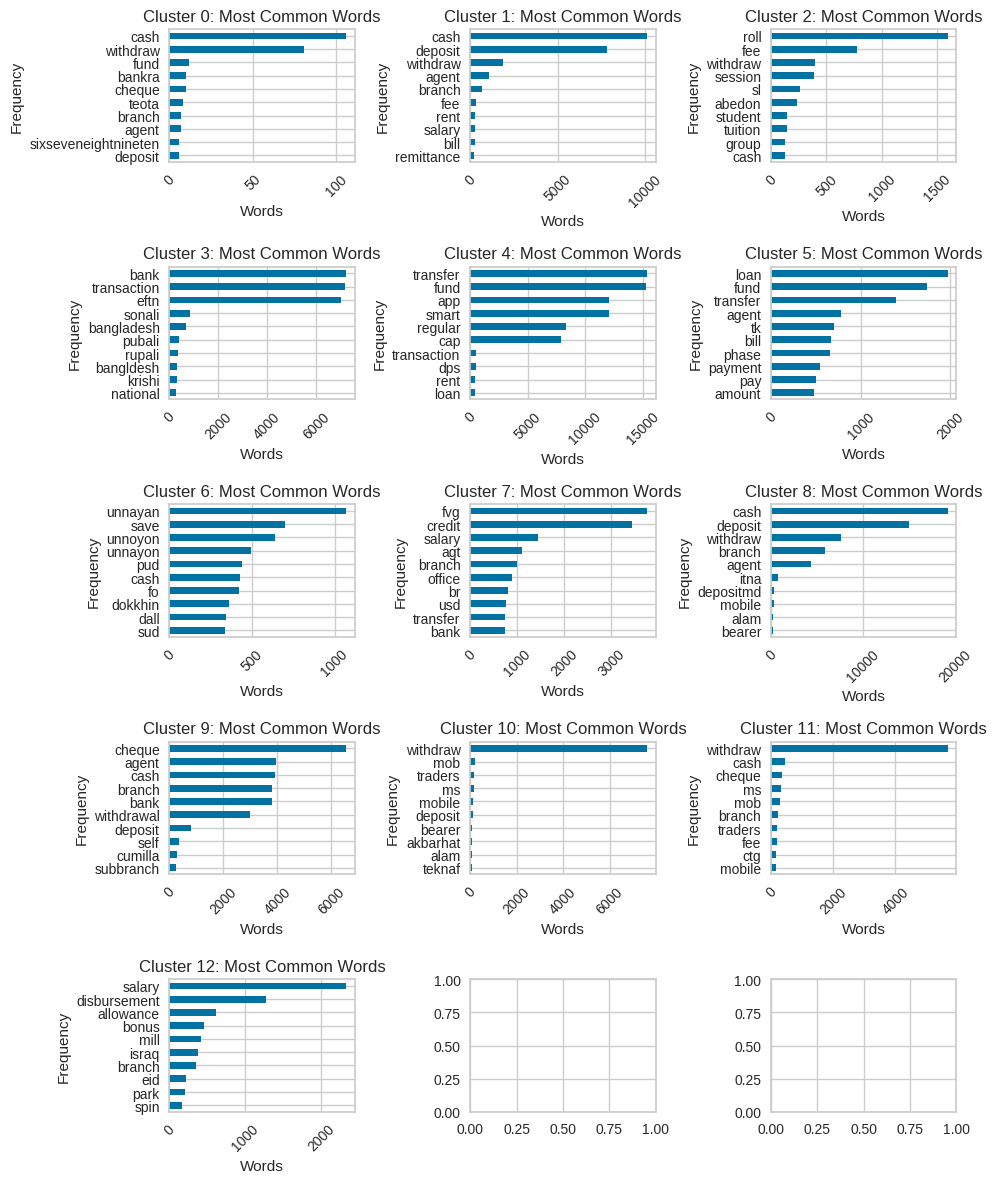

In [41]:
plot(narations,'k_cluster')

In [ ]:
for cluster, group in km_groups:
    tokens = []
    for token_list in group['tokens']:
        tokens.extend(token_list)
    common_tokens = pd.Series(tokens).value_counts().head(10)
    print("Cluster:", cluster)
    print(common_tokens)
    print()

**Basic prediction func for kmeans, minibatch, bisecting**

In [66]:
def predict(dataset,model):
    for index, row in dataset.iterrows():
        p=model.predict(row['avg_vec'].reshape(1, -1))
        dataset.at[index, 'pred'] = p[0]
   
    return dataset
    

**Used Only for one str of naration**

In [67]:
def text_predict(text,model):
    d=list()
    d.append(text)
    df_dummy=pd.DataFrame({'NARATION':d})
    df_dummy=tokenize(df_dummy)
    df_dummy=avg_vectorized(df_dummy)
    df_dummy=predict(df_dummy,model)
    return df_dummy

In [ ]:
df_dummy=text_predict('cash withdrawal',minibatch_model)
df_dummy

In [ ]:
narations=km_predict(narations,km_model)

In [ ]:
narations

**Elbow of minibatch kmeans**

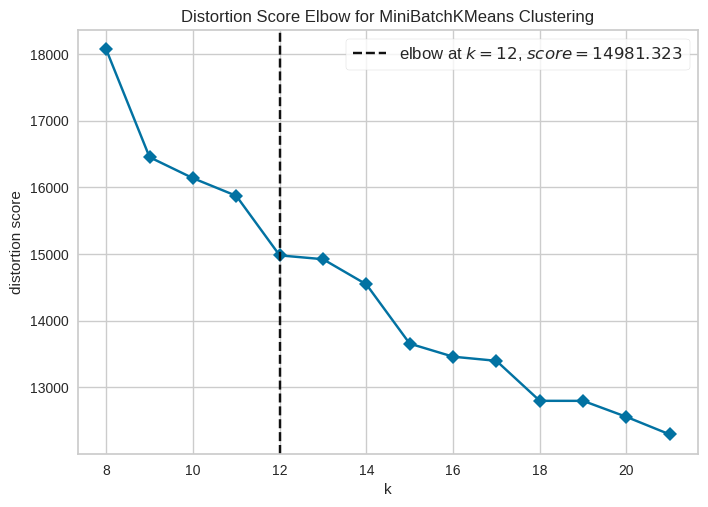

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
from yellowbrick.cluster import KElbowVisualizer
model = MiniBatchKMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(8,22), timings= False)
visualizer.fit(np.array(avg_vec_list))        # Fit data to visualizer
visualizer.show()

**Training Minibatch Kmeans**

In [44]:
def train_km_minibatch(dataset):
    avg_vec_list=dataset['avg_vec'].tolist()
    model = MiniBatchKMeans(n_clusters = 12, batch_size=1000, max_iter=300)
    # v_tokens=model.wv.get_normed_vectors()

    # type(avg_vec_list)
    model.fit(avg_vec_list)
    return model

In [45]:
minibatch_model=train_km_minibatch(narations)
len(minibatch_model.labels_)


121704

In [46]:
narations['mn_b']=minibatch_model.labels_

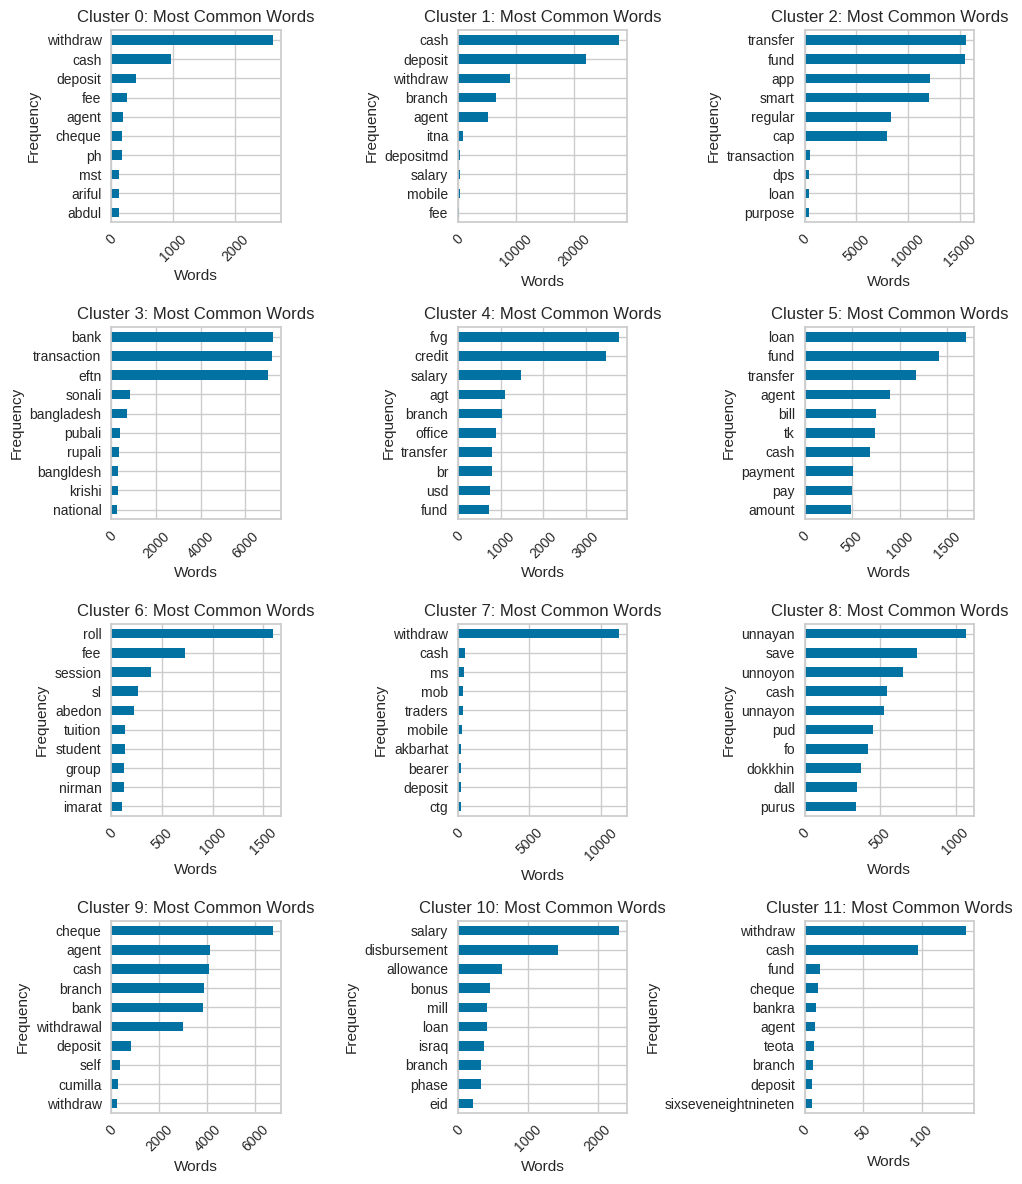

In [47]:
plot(narations,'mn_b')

**Prints 10 most common words in each cluster**

In [103]:
def key_words_in_clusters(dataset,column):
    minibatch_groups=dataset.groupby(column)
    for cluster, group in minibatch_groups:
        tokens = []
        for token_list in group['tokens']:
            tokens.extend(token_list)
        common_tokens = pd.Series(tokens).value_counts().head(2)
        print("Cluster:", cluster)
        print(common_tokens)
        print()

In [ ]:
import matplotlib.pyplot as plt
def plot_key_words_in_cluster(dataset,column):
    
    groups = dataset.groupby(column)
    for cluster, group in groups:
        tokens = []
        for token_list in group['tokens']:
            tokens.extend(token_list)
        common_tokens = pd.Series(tokens).value_counts().head(10)

        # Plot the most common words
        plt.figure(figsize=(8, 6))
        common_tokens.plot(kind='barh')
        plt.title(f"Cluster {cluster}: Most Common Words")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [40]:
def plot(dataset,column):
    

    minibatch_groups = dataset.groupby(column)
    num_clusters = len(minibatch_groups)
    num_cols = 3  # Number of columns to display

    num_rows = num_clusters // num_cols
    if num_clusters % num_cols != 0:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))

    for i, (cluster, group) in enumerate(minibatch_groups):
        tokens = []
        for token_list in group['tokens']:
            tokens.extend(token_list)
        common_tokens = pd.Series(tokens).value_counts().head(10)
        common_tokens = common_tokens.iloc[::-1]
        # Plot the most common words in a subplot
        ax = axes[i // num_cols, i % num_cols]
        common_tokens.plot(kind='barh', ax=ax)
        ax.set_title(f"Cluster {cluster}: Most Common Words")
        ax.set_xlabel("Words")
        ax.set_ylabel("Frequency")
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


**Finding Elbow for Bisecting**

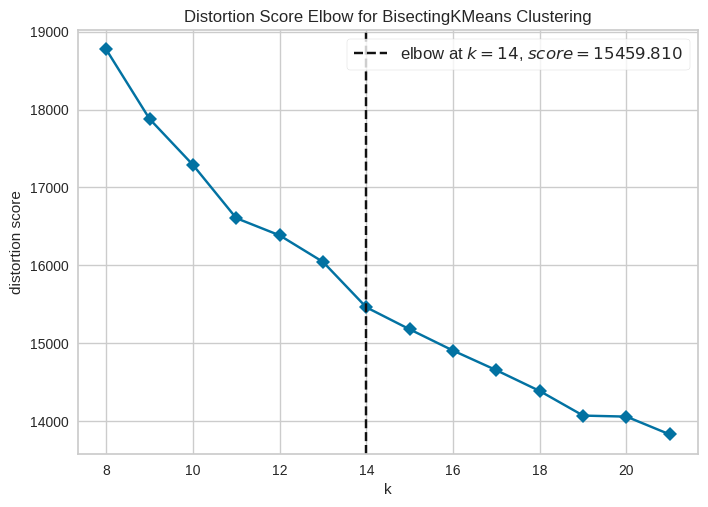

<Axes: title={'center': 'Distortion Score Elbow for BisectingKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer
model = BisectingKMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(8,22), timings= False)
visualizer.fit(np.array(avg_vec_list))        # Fit data to visualizer
visualizer.show()

**Bisecting Kmeans train func**

In [49]:
def train_km_bisect(dataset):
    avg_vec_list=dataset['avg_vec'].tolist()
    model = BisectingKMeans(n_clusters = 14, random_state=0)
    # v_tokens=model.wv.get_normed_vectors()

    # type(avg_vec_list)
    model.fit(avg_vec_list)
    return model

In [50]:
bisect_model=train_km_bisect(narations)
len(bisect_model.labels_)

121704

In [51]:
narations['k_b']=bisect_model.labels_

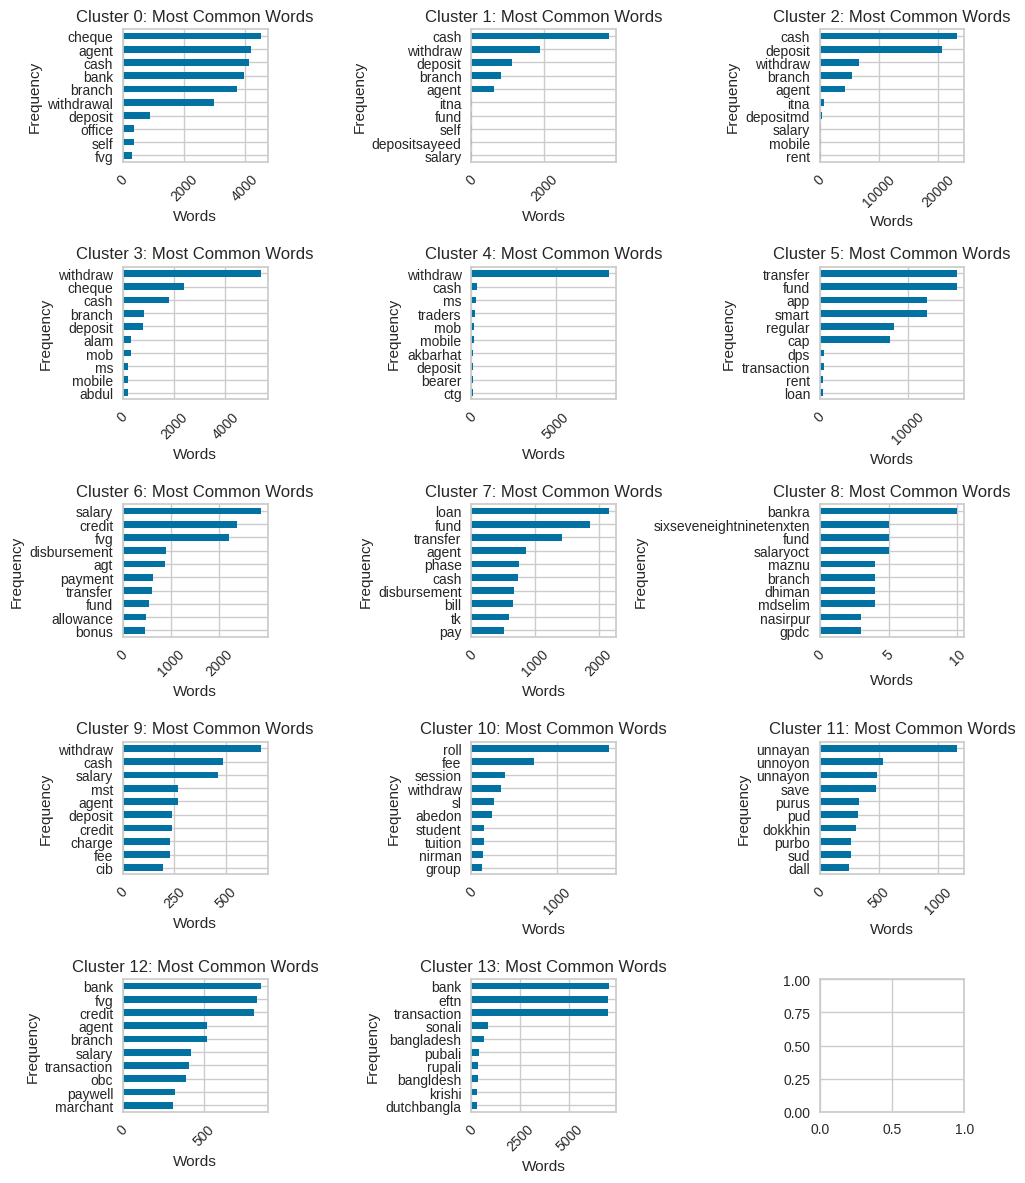

In [52]:
plot(narations,'k_b')

In [ ]:
key_words_in_clusters(narations,'k_b')

**Prediction Using DBScan Algo**

In [55]:
from sklearn.cluster import DBSCAN
def dbscan_prediction(dataset):
    test_avg_vec_list=dataset['avg_vec'].tolist()
    dbscan = DBSCAN(eps=.55, min_samples=1).fit_predict(test_avg_vec_list)
    dataset['d_c']=dbscan
    print(len(np.unique(dbscan)))
    return dataset

**Hierarichal_cluster**

In [155]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# def hierarichal_cluster(dataset):
lst=test_data['avg_vec'].tolist()
column=test_data['avg_vec']

# Assuming 'column' is your np array column
X = column.values.reshape(1, -1)  # Reshape the column if necessary

# Compute linkage matrix
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
#     show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    ) 
plt.show()

# Plot the dendrogram
# dendrogram(Z)

# Optional: Set the number of clusters based on dendrogram analysis
# num_clusters = 13

# # Cut the dendrogram to obtain cluster assignments
# labels = np.zeros(X.shape[0], dtype=int)
# labels[:-(num_clusters - 1)] = np.arange(1, num_clusters)

# # Print the assigned cluster labels for each data point
# print(labels)


ValueError: setting an array element with a sequence.

In [165]:
def show_dendogram(dataset):
    column=dataset['avg_vec']
    X = np.stack(column.values)  # Convert column to a 2D np array

    # Define a distance function for comparing np arrays
    def array_distance(a, b):
        return np.linalg.norm(a - b)  # Euclidean distance

    # Compute the distance matrix using the defined distance function
    distance_matrix = np.zeros((X.shape[0], X.shape[0]))  # Initialize the distance matrix
    for i in range(X.shape[0]):
        for j in range(i + 1, X.shape[0]):
            distance_matrix[i, j] = array_distance(X[i], X[j])
            distance_matrix[j, i] = distance_matrix[i, j]

    # Compute linkage matrix using the distance matrix
    Z = linkage(distance_matrix, method='average')

    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=12,  # show only the last p merged clusters
    #     show_leaf_counts=False,  # otherwise numbers in brackets are counts
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        ) 
    plt.show()

In [160]:
from scipy.cluster.hierarchy import fcluster
def hierarichal_cluster(dataset,mx_d): 
    max_d = mx_d
    clusters = fcluster(Z, max_d, criterion='distance')
    dataset['h_c']=clusters
    return dataset

In [161]:
test_data=hierarichal_cluster(test_data,1)

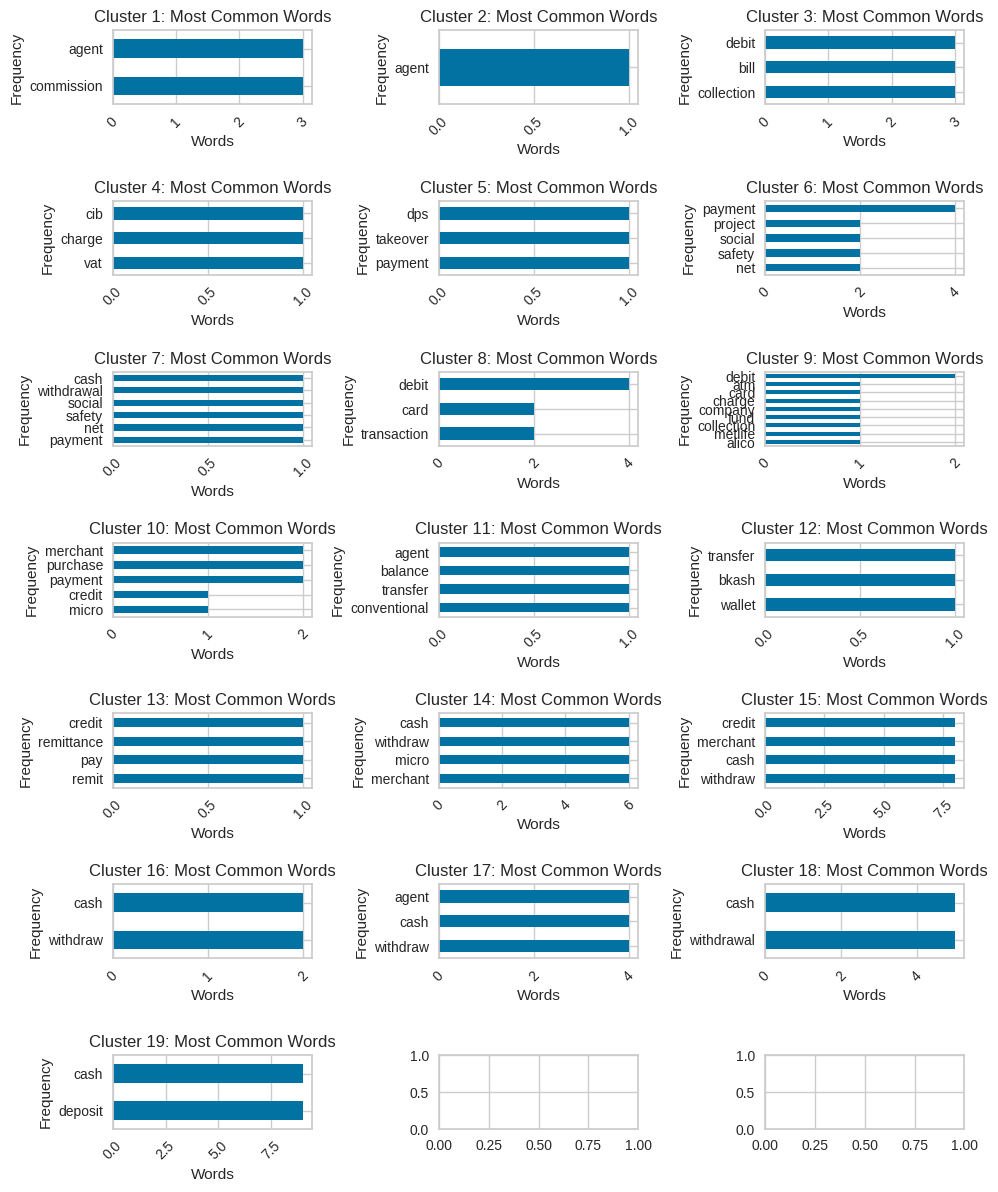

In [162]:
plot(test_data,'h_c')

# **Train**

In [ ]:
data=pd.read_csv('/kaggle/input/transaction-naration-data-set/Transaction_Naration_Data_Set.csv')
data.head()

In [ ]:
                        
sub_data=drop_duplicates(data)

sub_data=drop_null(sub_data)


In [ ]:
narations=sub_data[['NARATION','AC_ID']].copy()
narations.tail()

In [ ]:
narations=tokenize(narations)
narations.tail()

In [ ]:
nar_data.dropna(subset=['NARATION'],inplace=True)

In [ ]:
narations=drop_empty_tokens(narations)
narations.tail()

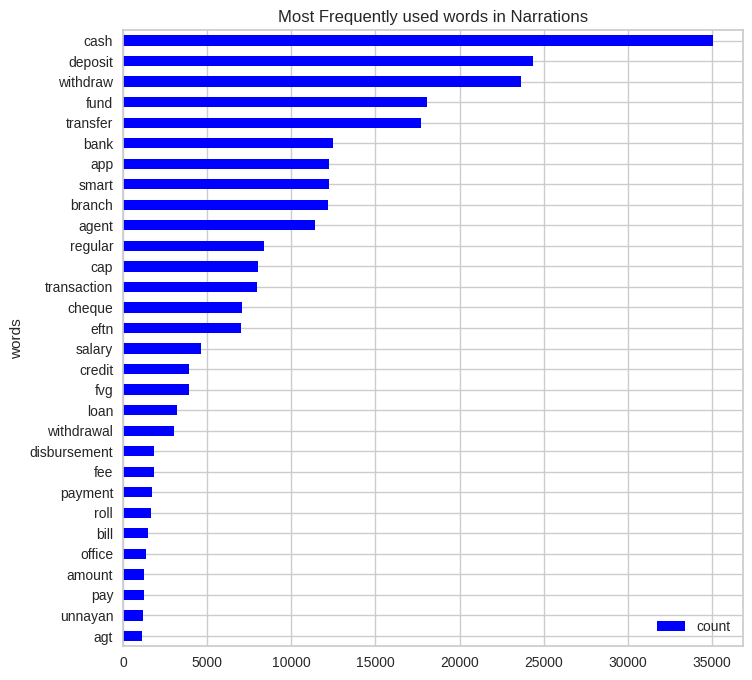

In [54]:
most_common_tokens_bar(narations)

In [ ]:
narations=avg_vectorized(narations)
narations.head()

In [ ]:
# kmeans
km_model=train_kmeans(narations)
narations['k_cluster']=km_model.labels_
plot(narations,'k_cluster')

# minibatc
minibatch_model=train_km_minibatch(narations)
narations['mn_b']=minibatch_model.labels_
plot(narations,'mn_b')

# bisect
bisect_model=train_km_bisect(narations)
narations['k_b']=bisect_model.labels_
plot(narations,'k_b')

# narations=dbscan_prediction(narations)
# plot(narations,'d_c')

**Exporting trained models**

In [56]:
import pickle

# Assuming your trained KMeans model is stored in the variable 'kmeans_model'
# Specify the file path where you want to save the model
model_file_path = "/kaggle/working/kmeans_model.pkl"

# Save the model using pickle.dump()
with open(model_file_path, "wb") as file:
    pickle.dump(km_model, file)
    
model_file_path = "/kaggle/working/minibatch_model.pkl"

# Save the model using pickle.dump()
with open(model_file_path, "wb") as file:
    pickle.dump(minibatch_model, file)

model_file_path = "/kaggle/working/bisect_model.pkl"

# Save the model using pickle.dump()
with open(model_file_path, "wb") as file:
    pickle.dump(bisect_model, file)

# **Tests**

In [59]:
test_data=pd.read_csv('/kaggle/input/transaction-naration-data-set-test/test.csv')
test_data.head()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR,k_cluster
0,1,1175256,342800.0,1-Nov-22,Cash Withdrawal From A/C No.:,Credit,1
1,2,2298226,1500.0,1-Nov-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,9
2,3,4066427,1500.0,1-Nov-22,Credit Against Merchant Cash Withdraw Service ...,Credit,9
3,4,1978564,2550.0,1-Nov-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,9
4,5,4890311,2550.0,1-Nov-22,Credit Against Merchant Cash Withdraw Service ...,Credit,9


In [57]:
model_file_path='/kaggle/working/kmeans_model.pkl'
with open(model_file_path, "rb") as file:
    km_model_tst = pickle.load(file)
    
model_file_path='/kaggle/working/minibatch_model.pkl'
with open(model_file_path, "rb") as file:
    mn_batch_model_tst = pickle.load(file)
    
    
model_file_path='/kaggle/working/bisect_model.pkl'
with open(model_file_path, "rb") as file:
    bisect_model_tst = pickle.load(file)

In [60]:
test_data=tokenize(test_data)


In [61]:
test_data.tail()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR,k_cluster,tokens
50,641,108456,18000.0,1-Nov-22,Agent Balance Transfer From Islamic To Convent...,Credit,13,"[agent, balance, transfer, conventional]"
51,51,3120997,1500.0,1-Nov-22,"Credit For Remittance Pay, Remit No:TF Of TF",Debit,8,"[credit, remittance, pay, remit]"
52,52,5366684,1500.0,1-Nov-22,DPS Takeover Payment From A/C No.:,Credit,14,"[dps, takeover, payment]"
53,125,5572349,200.0,1-Nov-22,AGRI Agent Commission of,Debit,5,"[agent, commission]"
54,53,5775256,100000.0,1-Nov-22,Transfer to bKash wallet,Debit,13,"[transfer, bkash, wallet]"


In [62]:
test_data.shape

(55, 8)

In [63]:
test_data=drop_empty_tokens(test_data)

In [64]:
test_data.shape

(55, 8)

In [65]:
test_data=avg_vectorized(test_data)

In [85]:
test_data=predict(test_data,bisect_model_tst)   #adds a 'pred' column with predicted cluster values

In [86]:
test_data.head()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR,k_cluster,tokens,vectorized,avg_vec,pred,d_c
0,1,1175256,342800.0,1-Nov-22,Cash Withdrawal From A/C No.:,Credit,1,"[cash, withdrawal]","[[-0.009431221, 0.0042067803, 0.0902436, 0.159...","[-0.050331130623817444, -0.056889114901423454,...",1.0,0
1,2,2298226,1500.0,1-Nov-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,9,"[cash, withdraw, micro, merchant]","[[-0.009431221, 0.0042067803, 0.0902436, 0.159...","[-0.08092858918826096, 0.06954739522188902, 0....",1.0,1
2,3,4066427,1500.0,1-Nov-22,Credit Against Merchant Cash Withdraw Service ...,Credit,9,"[credit, merchant, cash, withdraw]","[[-0.14194332, 0.16056308, -0.0033713633, -0.0...","[-0.07455203586141579, 0.07054649572819471, 0....",1.0,1
3,4,1978564,2550.0,1-Nov-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,9,"[cash, withdraw, micro, merchant]","[[-0.009431221, 0.0042067803, 0.0902436, 0.159...","[-0.08092858918826096, 0.06954739522188902, 0....",1.0,1
4,5,4890311,2550.0,1-Nov-22,Credit Against Merchant Cash Withdraw Service ...,Credit,9,"[credit, merchant, cash, withdraw]","[[-0.14194332, 0.16056308, -0.0033713633, -0.0...","[-0.07455203586141579, 0.07054649572819471, 0....",1.0,1


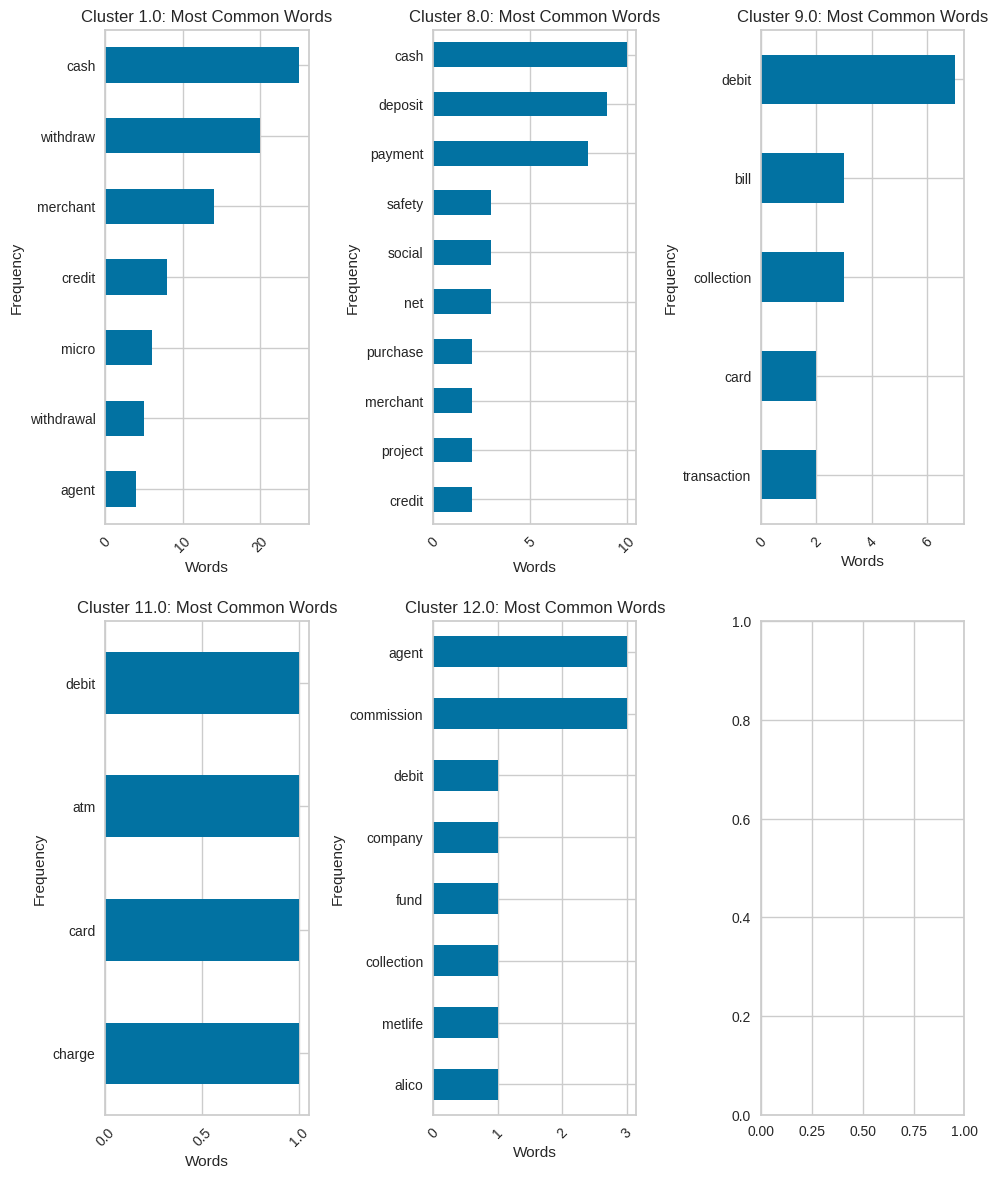

In [87]:
plot(test_data,'pred')

In [82]:
test_data=dbscan_prediction(test_data)

12


In [83]:
test_data.head()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR,k_cluster,tokens,vectorized,avg_vec,pred,d_c
0,1,1175256,342800.0,1-Nov-22,Cash Withdrawal From A/C No.:,Credit,1,"[cash, withdrawal]","[[-0.009431221, 0.0042067803, 0.0902436, 0.159...","[-0.050331130623817444, -0.056889114901423454,...",11.0,0
1,2,2298226,1500.0,1-Nov-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,9,"[cash, withdraw, micro, merchant]","[[-0.009431221, 0.0042067803, 0.0902436, 0.159...","[-0.08092858918826096, 0.06954739522188902, 0....",11.0,1
2,3,4066427,1500.0,1-Nov-22,Credit Against Merchant Cash Withdraw Service ...,Credit,9,"[credit, merchant, cash, withdraw]","[[-0.14194332, 0.16056308, -0.0033713633, -0.0...","[-0.07455203586141579, 0.07054649572819471, 0....",11.0,1
3,4,1978564,2550.0,1-Nov-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,9,"[cash, withdraw, micro, merchant]","[[-0.009431221, 0.0042067803, 0.0902436, 0.159...","[-0.08092858918826096, 0.06954739522188902, 0....",11.0,1
4,5,4890311,2550.0,1-Nov-22,Credit Against Merchant Cash Withdraw Service ...,Credit,9,"[credit, merchant, cash, withdraw]","[[-0.14194332, 0.16056308, -0.0033713633, -0.0...","[-0.07455203586141579, 0.07054649572819471, 0....",11.0,1


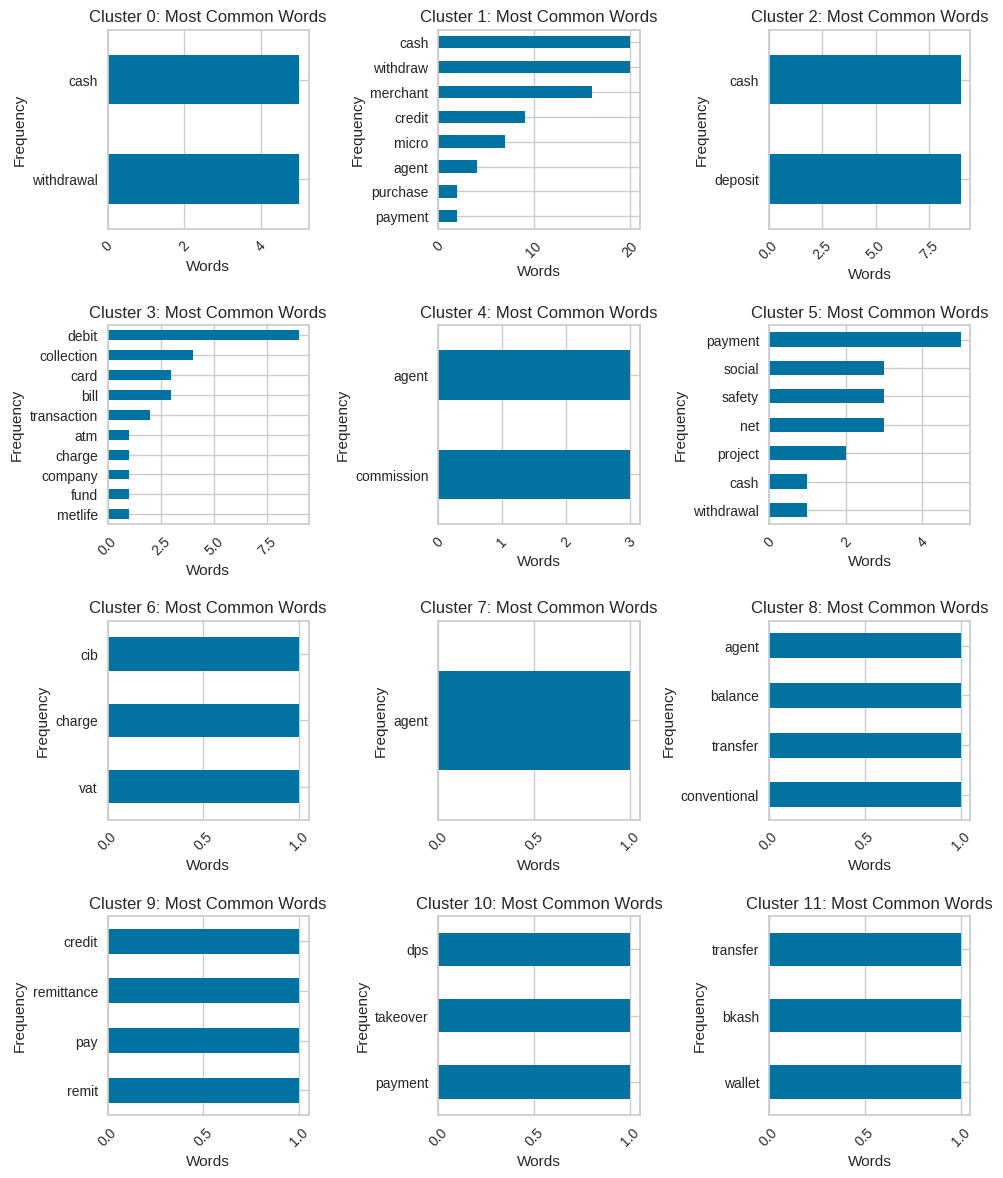

In [84]:
plot(test_data,'d_c')

**hierarchy**

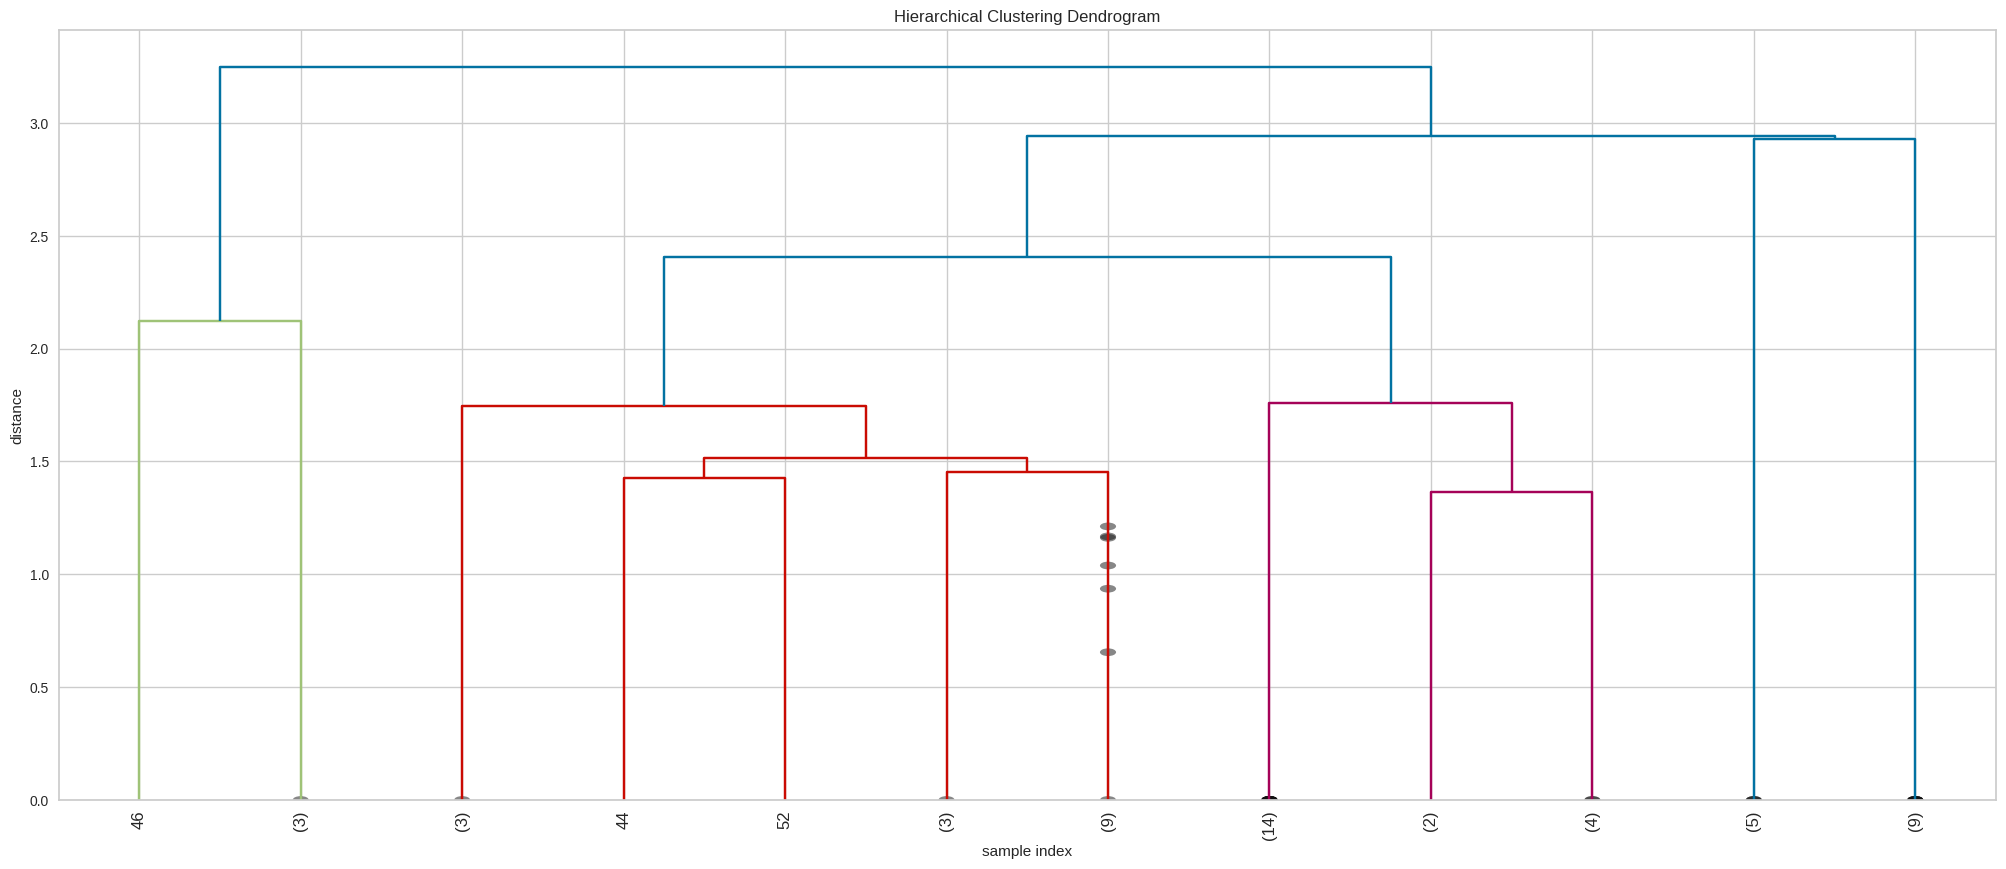

In [166]:
show_dendogram(test_data)

In [172]:
test_data=hierarichal_cluster(test_data,1.5)

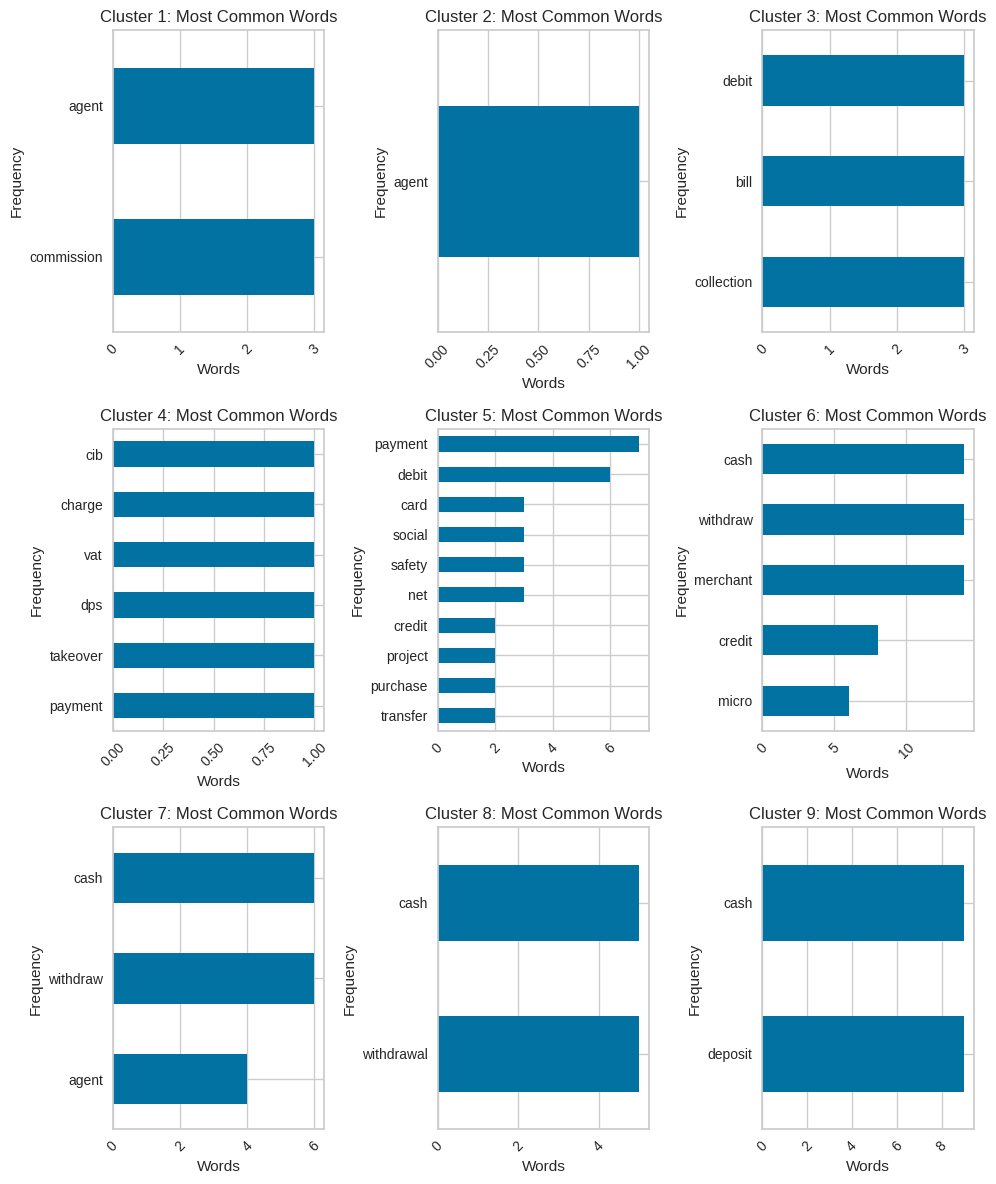

In [176]:
plot(test_data,'h_c')

In [ ]:
c=0
for index, row in test_data.iterrows():
        # Check if the token list is empty
        if len(row['tokens']) == 0:
#             print("Row", index, "has an empty token list")
            c+=1
print(c)

In [88]:
narations

,NARATION,AC_ID,tokens,vectorized,avg_vec,k_cluster,mn_b,k_b
0,Cash Withdraw,3644877,"[cash, withdraw]","[[-0.0133382995, 0.06694116, -0.04999457, 0.18...","[-0.09153545740991831, 0.06871321052312851, -0...",8,1,1
1,Cash Withdrawal From A/C No.:,1175256,"[cash, withdrawal]","[[-0.0133382995, 0.06694116, -0.04999457, 0.18...","[-0.07609830144792795, 0.09331553056836128, -0...",8,1,2
2,"Cash withdraw from Micro Merchant point, MM A/C",2298226,"[cash, withdraw, micro, merchant]","[[-0.0133382995, 0.06694116, -0.04999457, 0.18...","[0.014512681867927313, 0.052446963265538216, -...",1,5,9
3,Credit Against Merchant Cash Withdraw Service ...,4066427,"[credit, merchant, cash, withdraw]","[[-0.053178236, 0.031390846, -0.016621001, -0....","[-0.031515220645815134, 0.0523514449596405, -0...",1,4,2
6,Cash Deposit to A/C No.:,38418,"[cash, deposit]","[[-0.0133382995, 0.06694116, -0.04999457, 0.18...","[-0.05596162844449282, 0.11504308879375458, 0....",8,1,2
...,...,...,...,...,...,...,...,...
22536013,"Smart App, Fund Transfer. wife DPS Money",652566,"[smart, app, fund, transfer, wife]","[[0.12165614, 0.017591655, 0.14168067, 0.07436...","[0.09689678549766541, 0.0345319252461195, 0.04...",4,2,5
22536483,Cash Deposit Suraighat bazar SME,5418855,"[cash, deposit]","[[-0.0133382995, 0.06694116, -0.04999457, 0.18...","[-0.05596162844449282, 0.11504308879375458, 0....",8,1,2
22538051,Cash Deposit Raigor Mohila dol,5418855,"[cash, deposit, raigor]","[[-0.0133382995, 0.06694116, -0.04999457, 0.18...","[-0.03490364924073219, 0.08144292328506708, 0....",1,1,2
22539045,"Transaction For Fund Transfer. Smart App, Regu...",4199653,"[transaction, fund, transfer, smart, app, regu...","[[0.053028584, -0.026507877, 0.04588844, -0.13...","[0.05413896143436432, 0.036645031487569216, 0....",4,2,5


**Train acc**

In [ ]:
from sklearn.metrics import silhouette_score

In [89]:
silhouette_avg = silhouette_score(avg_vec_list, km_model.labels_)
print('silhouette accuracy of kmeans: ',silhouette_avg)   # scoring is btn -1 to 1

silhouette accuracy of kmeans:  0.2507169953087442


In [105]:
silhouette_avg = silhouette_score(avg_vec_list, minibatch_model.labels_)
print('silhouette accuracy of mn_batch: ',silhouette_avg)   # scoring is btn -1 to 1

silhouette accuracy of mn_batch:  0.28827707754595355


In [107]:
silhouette_avg = silhouette_score(avg_vec_list, bisect_model.labels_)
print('silhouette accuracy of bisecting: ',silhouette_avg)   # scoring is btn -1 to 1

silhouette accuracy of bisecting:  0.23905744113410093


**Test acc**

In [174]:
# print(len(np.unique(dbscan)))
dbscan=test_data['d_c'].tolist()
h_cluster=test_data['h_c'].tolist()


In [92]:
test_avg_vec_list=test_data['avg_vec'].tolist()

In [175]:
silhouette_avg = silhouette_score(test_avg_vec_list, h_cluster)
print('silhouette accuracy of hierarchy cluster: ',silhouette_avg)    #quality of clusters

silhouette accuracy of hierarchy cluster:  0.5720707302567162


In [93]:
silhouette_avg = silhouette_score(test_avg_vec_list, dbscan)
print('silhouette accuracy of dbscan: ',silhouette_avg)    #quality of clusters

silhouette accuracy of dbscan:  0.5472119978016706


In [97]:
labels = test_data['pred'].tolist()   #for 15 cluster acc max
# labels

In [98]:
silhouette_avg = silhouette_score(test_avg_vec_list, labels)
print('silhouette accuracy of kmeans: ',silhouette_avg)      ##quality of clusters

silhouette accuracy of kmeans:  0.2229714382398746


In [99]:
true_l=test_data['k_cluster']
true_l=np.array(true_l)

In [100]:
from sklearn.metrics import adjusted_rand_score

In [101]:
ari = adjusted_rand_score(true_l, dbscan)
print('Adjusted Rand Index acc dbscan: ',ari)      #acc compared to true val

Adjusted Rand Index acc dbscan:  0.5553645688938176


In [102]:
ari = adjusted_rand_score(true_l, labels)
print('Adjusted Rand Index acc bisecting :',ari)      #acc compared to true val

Adjusted Rand Index acc bisecting : 0.43111831442463533


In [177]:
test_data.to_csv('test_result.csv', index=False)

In [ ]:
narations.to_csv('naration_vec.csv',index=False)

In [178]:
!pip freeze > requirements.txt